<img src="figures\logo_uninorte.jpg" width=400 height=400 />
<pre><center><h1>
Modelamiento Predictivo con Series de Tiempo 
y Deep Learning

Sección 1
Departamento de Matemáticas y Estadística
Lihki Rubio
lihkir@uninorte.edu.co
</pre></center></h1>

<h1>1. Datos transversales</h1>

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('datasets/WDIData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


- Como se desprende de la estructura de los datos, cada fila ofrece las observaciones sobre un indicador que se identifica por las columnas `Indicator Name` y `Indicator Code` y para el país, que se indica mediante las columnas `Country Name` y `Country Code`. 
- Las columnas 1960 a 2016 tienen los valores de un indicador durante el mismo período de tiempo. 

In [4]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (401016, 62)


- Este conjunto de datos tiene casi 401016 filas porque recoge 1504 indicadores de desarrollo mundial para 264 países diferentes. 
- Esta información sobre el número único de indicadores y países puede obtenerse ejecutando las cuatro líneas siguientes:

In [5]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


- Comencemos por preparar otros dos DataFrames que obtengan las filas correspondientes a los indicadores `Total Central Government Debt (as % of GDP)` y `Military expenditure (% of GDP)` para todos los países. Esto se hace cortando el DataFrame original de la siguiente manera:

In [6]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [7]:
central_govt_debt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
158,Arab World,ARB,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1677,Caribbean small states,CSS,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,Central Europe and the Baltics,CEB,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.311142,44.073793,47.446156,49.861925,52.42919,54.05893,53.733365,53.075621,NaN,NaN
4715,Early-demographic dividend,EAR,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6234,East Asia & Pacific,EAS,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
military_exp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
835,Arab World,ARB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.624766,4.625488,5.258110,3.786178,4.688722,5.833811,...,4.256868,5.408117,5.117807,4.999759,5.181931,5.819039,6.294543,7.459392,6.230356,NaN
2354,Caribbean small states,CSS,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.710845,NaN,NaN,0.745508,NaN,NaN,NaN,NaN,NaN,NaN
3873,Central Europe and the Baltics,CEB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.535961,1.544634,1.482543,1.415789,1.399584,1.374770,1.408301,1.538120,1.514259,NaN
5392,Early-demographic dividend,EAR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2.301095,2.165514,2.316801,2.735854,2.680945,2.949448,...,2.246538,2.550853,2.335511,2.214681,2.295853,2.387394,2.582505,2.704375,2.435147,NaN
6911,East Asia & Pacific,EAS,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.551240,1.653801,1.563325,1.550936,1.564535,1.631465,1.680611,1.728939,1.695960,NaN


- Las dos líneas anteriores crean dos nuevos DataFrames, a saber, `central_govt_debt` y `militar_exp`. Se puede hacer una comprobación rápida de las formas de estos DataFrames ejecutando las dos líneas siguientes

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


- Estos DataFrames tienen toda la información que necesitamos. 
- Para trazar los datos transversales univariantes y bivariantes de la figura anterior, necesitamos la columna 2010. 
- Antes de ejecutar el código para el trazado, comprobemos rápidamente si falta la columna 2010. 
- Este se hace mediante las dos líneas siguientes:

In [10]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

- Además, nos gustaría que la columna `Country Code` fuera los índices de las filas. Así que se ejecutan las siguiente par de líneas se ejecutan:

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [13]:
central_govt_debt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,Arab World,ARB,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSS,Caribbean small states,CSS,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEB,Central Europe and the Baltics,CEB,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.311142,44.073793,47.446156,49.861925,52.42919,54.05893,53.733365,53.075621,NaN,NaN
EAR,Early-demographic dividend,EAR,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAS,East Asia & Pacific,EAS,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
military_exp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,Arab World,ARB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.624766,4.625488,5.258110,3.786178,4.688722,5.833811,...,4.256868,5.408117,5.117807,4.999759,5.181931,5.819039,6.294543,7.459392,6.230356,NaN
CSS,Caribbean small states,CSS,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.710845,NaN,NaN,0.745508,NaN,NaN,NaN,NaN,NaN,NaN
CEB,Central Europe and the Baltics,CEB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.535961,1.544634,1.482543,1.415789,1.399584,1.374770,1.408301,1.538120,1.514259,NaN
EAR,Early-demographic dividend,EAR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2.301095,2.165514,2.316801,2.735854,2.680945,2.949448,...,2.246538,2.550853,2.335511,2.214681,2.295853,2.387394,2.582505,2.704375,2.435147,NaN
EAS,East Asia & Pacific,EAS,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.551240,1.653801,1.563325,1.550936,1.564535,1.631465,1.680611,1.728939,1.695960,NaN


- A continuación, creamos dos pandas.Series tomando columnas no vacías de 2010 de `central_govt_debt` y `military_exp`. Los objetos Series recién creados se se fusionan para formar un único DataFrame:

In [15]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


- Para graficar, tenemos que tomar sólo aquellos países que tienen tanto deuda del gobierno central como gasto militar. Ejecute la siguiente línea, para filtrar las filas con valores perdidos:

In [16]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) 
                                & (~pd.isnull(data_to_plot.military_exp)), :]

In [17]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [18]:
data_to_plot.isnull().values.any()

False

- La tabla anterior sólo tiene valores no vacíos y ahora estamos listos para generar los gráficos para los datos transversales. 
- Las siguientes líneas de código generan el gráfico de los datos univariantes sobre el gasto militar:

Text(0.5, 1.0, 'Military expenditure (% of GDP) of 85 countries in 2010')

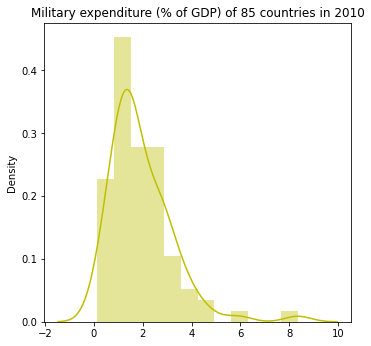

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False, color="y")
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')

- También generaremos el gráfico bivariante entre el gasto militar y la deuda del gobierno central ejecutando el siguiente código:

Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2010')

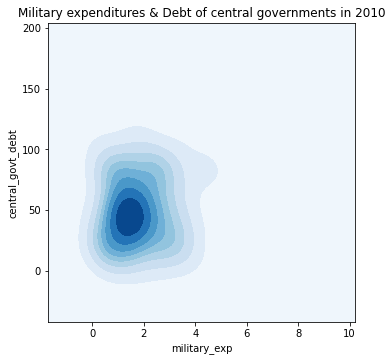

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt, cmap='Blues', shade=True, shade_lowest=True)
g.set_title('Military expenditures & Debt of central governments in 2010')